# Project Part 5.3: Time Series Analysis (2018 UEFA Champions League Final)

In [102]:
import json
import os
import pandas as pd
import numpy as np
import os
import re
import math
import string
import requests
import json
from itertools import product
from inspect import getsourcefile
from io import open

os.chdir('C:\\Users\\wmj51\\Desktop\\python')
pd.set_option('display.max_colwidth', -1)

In [103]:
mdf2 = pd.read_csv('RMadrid_period.csv',index_col=0)
ldf2 = pd.read_csv('Liverp_period.csv', index_col=0)
mdf2.dropna(inplace=True)
ldf2.dropna(inplace=True)

com_mdf= mdf2.groupby('created_at', as_index=False)['compound'].mean()
pos_mdf= mdf2.groupby('created_at', as_index=False)['pos'].mean()
neg_mdf= mdf2.groupby('created_at', as_index=False)['neg'].mean()
neu_mdf= mdf2.groupby('created_at', as_index=False)['neu'].mean()

com_mdf2= mdf2.groupby('period', as_index=False)['compound'].mean()
pos_mdf2= mdf2.groupby('period', as_index=False)['pos'].mean()
neg_mdf2= mdf2.groupby('period', as_index=False)['neg'].mean()
neu_mdf2= mdf2.groupby('period', as_index=False)['neu'].mean()

com_ldf= ldf2.groupby('created_at', as_index=False)['compound'].mean()
pos_ldf= ldf2.groupby('created_at', as_index=False)['pos'].mean()
neg_ldf= ldf2.groupby('created_at', as_index=False)['neg'].mean()
neu_ldf= ldf2.groupby('created_at', as_index=False)['neu'].mean()

com_ldf2= ldf2.groupby('period', as_index=False)['compound'].mean()
pos_ldf2= ldf2.groupby('period', as_index=False)['pos'].mean()
neg_ldf2= ldf2.groupby('period', as_index=False)['neg'].mean()
neu_ldf2= ldf2.groupby('period', as_index=False)['neu'].mean()

com_mdf2 = com_mdf2.reindex([3,0,1,2])
com_mdf2.reset_index(inplace=True)
del com_mdf2['index']
com_ldf2 = com_ldf2.reindex([3,0,1,2])
com_ldf2.reset_index(inplace=True)
del com_ldf2['index']
pos_mdf2 = pos_mdf2.reindex([3,0,1,2])
pos_mdf2.reset_index(inplace=True)
del pos_mdf2['index']
pos_ldf2 = pos_ldf2.reindex([3,0,1,2])
pos_ldf2.reset_index(inplace=True)
del pos_ldf2['index']
neg_mdf2 = neg_mdf2.reindex([3,0,1,2])
neg_mdf2.reset_index(inplace=True)
del neg_mdf2['index']
neg_ldf2 = neg_ldf2.reindex([3,0,1,2])
neg_ldf2.reset_index(inplace=True)
del neg_ldf2['index']
neu_mdf2 = neu_mdf2.reindex([3,0,1,2])
neu_mdf2.reset_index(inplace=True)
del neu_mdf2['index']
neu_ldf2 = neu_ldf2.reindex([3,0,1,2])
neu_ldf2.reset_index(inplace=True)
del neu_ldf2['index']

## Overview of pre-and post changes

In [111]:
mdf2['period'] = mdf2['period'].map({'pre-event':'pre-event',
                                    'post-event-week1':'post-event',
                                    'post-event-week2':'post-event',
                                    'post-event-week3':'post-event'})

import plotly
plotly.tools.set_credentials_file(username='mengjie514', api_key='B1d8FBE9f7MnaaY91hJS')

%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go

Compound = go.Box(y = mdf2['compound'], x = mdf2['period'],boxpoints = 'suspectedoutliers')
Positive = go.Box(y = mdf2['pos'], x = mdf2['period'], boxpoints = 'suspectedoutliers')
Negative = go.Box(y = mdf2['neg'], x = mdf2['period'], boxpoints = 'suspectedoutliers')
Neutral = go.Box(y = mdf2['neu'], x = mdf2['period'], boxpoints = 'suspectedoutliers')

data = [Compound, Positive,Negative,Neutral]
layout = go.Layout(
    yaxis=dict(
        title='RealMadrid',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [107]:
compound = go.Box(y = ldf2['compound'], x = ldf2['period'],boxpoints = 'suspectedoutliers')
positive = go.Box(y = ldf2['pos'], x = ldf2['period'], boxpoints = 'suspectedoutliers')
negative = go.Box(y = ldf2['neg'], x = ldf2['period'], boxpoints = 'suspectedoutliers')
neutral = go.Box(y = ldf2['neu'], x = ldf2['period'], boxpoints = 'suspectedoutliers')

data = [compound, positive,negative,neutral]
layout = go.Layout(
    yaxis=dict(
        title='Liverpool',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Computing changes over four periods

According to the results shown in R file, we now look for trends over pre and post periods from 21 May to 16 June 2018. The game was played on 26 May 2018, between Spanish side and defending champions Real Madrid, who had won the competition in each of the last two seasons, and English side Liverpool. 

The compound value peaks at the highest point at 0.21 from the side Liverpool, but continuously dropping down and bottom out at the second week after the game (compound value = 0.08), then to turn up at the post-week 3 (compound value = 0.15).
Looking at the positive and negative value from the side of Real Madrid, the values starts at an extremely high (0.19) and low point (0.04) separately, but then change dramatically over period. Even though there is a bit increase of positive value in the first week after the game, a huge decrease can be found afterwards with a quick slowdown in decreasing until the post-week3. Starting from the lowest point of 0.04, however, the negative value increases nearly 0.45 point and peaks up one week after the game. 

For a short note here, as its reported 'thousands of people have signed a petition demanding punishment for Real Madrid’s captain Sergio Ramos following the Champions League final on May 26' ("Ramos' 'Dirty Tricks': Thousands Sign Petition Against Real Madrid Captain", 2018), the supporters of Real Madrid tweeted saying such as 'Don't be silly', 'Can't believe some wools starting a petition to demand UEFA take action over Ramos. That's shameful that. Just call him a cunt and move on. Sad times.' after the game and remain the negatives almost whole period. 

Find more at : Ramos' 'Dirty Tricks': Thousands Sign Petition Against Real Madrid Captain. (2018). Retrieved from https://sputniknews.com/sport/201805281064877180-petition-against-ramos-real-madrid/ 

Results of Real Madrid (Overall Mean Value)
             period  compound
0  pre-event         0.254458
1  post-event-week1  0.171527
2  post-event-week2  0.128280
3  post-event-week3  0.143204
-------------------------------------------
Results of Liverpool (Overall Mean Value)
             period  compound
0  pre-event         0.205518
1  post-event-week1  0.132678
2  post-event-week2  0.080782
3  post-event-week3  0.157158


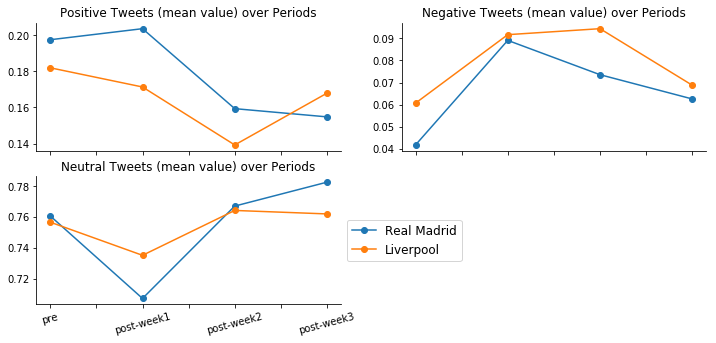

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import io
from datetime import datetime

plt.figure()
fig = plt.figure(figsize=(12,8));
ax1 = plt.subplot(321)
ax1.set_xticklabels([])
plt.plot(pos_mdf2.pos,'-o',
         pos_ldf2.pos,'-o')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Positive Tweets (mean value) over Periods')

ax2 = plt.subplot(322)
ax2.set_xticklabels([])
plt.plot(neg_mdf2.neg,'-o',
         neg_ldf2.neg,'-o')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Negative Tweets (mean value) over Periods')

ax3 = plt.subplot(323)
ax3.set_xticklabels([])
plt.plot(neu_mdf2.neu,'-o',
         neu_ldf2.neu,'-o')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Neutral Tweets (mean value) over Periods')
ax3.set_xticklabels(['','pre','','post-week1','','post-week2','','post-week3',''])
plt.xticks(rotation = 15)
plt.legend(bbox_to_anchor=(0.05, 0.87, 1., .102), loc=2,borderaxespad=0., fontsize='medium')
plt.legend(('Real Madrid','Liverpool'),loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':12})

print('Results of Real Madrid (Overall Mean Value)')
print(com_mdf2)
print("-------------------------------------------")
print('Results of Liverpool (Overall Mean Value)')
print(com_ldf2)